<a href="https://colab.research.google.com/github/Ment1984/zarouali-ment-khoualha/blob/main/Text%20Analitic%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from wordcloud import WordCloud
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import requests

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving IMDB Dataset.csv to IMDB Dataset.csv


In [ ]:
import pandas as pd
df = pd.read_csv("/content/IMDB Dataset.csv")
df.head()


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
import pandas as pd
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
df.info()
df.isnull().sum()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [ ]:
print(df.columns)


Index(['review', 'sentiment'], dtype='object')


In [ ]:
import nltk
nltk.data.path.append('/root/nltk_data')


In [ ]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
def clean_text_simple(text):
    text = text.lower()
    tokens = text.split()
    tokens = [word for word in tokens if word not in string.punctuation]
    stop_words = set(["the", "and", "is", "a", "of", "to", "in"])
    tokens = [word for word in tokens if word not in stop_words]

    return " ".join(tokens)

df['cleaned_review'] = df['review'].apply(clean_text_simple)


In [ ]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
import nltk
print(nltk.data.find('tokenizers/punkt'))


/root/nltk_data/tokenizers/punkt


In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string


lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))
def clean_text(text):

    text = text.lower()

    tokens = re.findall(r'\b\w+\b', text)

    tokens = [word for word in tokens if word not in stop_words]

    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    cleaned_text = ' '.join(tokens)

    return cleaned_text

df['cleaned_review'] = df['review'].apply(clean_text)

df[['review', 'cleaned_review']].head()


,review,cleaned_review
0,One of the other reviewers has mentioned that ...,one reviewer mentioned watching 1 oz episode h...
1,A wonderful little production. <br /><br />The...,wonderful little production br br filming tech...
2,I thought this was a wonderful way to spend ti...,thought wonderful way spend time hot summer we...
3,Basically there's a family where a little boy ...,basically family little boy jake think zombie ...
4,"Petter Mattei's ""Love in the Time of Money"" is...",petter mattei love time money visually stunnin...


In [ ]:
import nltk
nltk.download('punkt_tab')


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
from nltk.tokenize import word_tokenize
text = "This is a test sentence."
tokens = word_tokenize(text)
print(tokens)


['This', 'is', 'a', 'test', 'sentence', '.']


In [ ]:
import pandas as pd
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))
def clean_text(text):
    tokens = word_tokenize(text)
    tokens = [word.lower() for word in tokens if word.isalpha()]
    tokens = [word for word in tokens if word not in stop_words]
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    cleaned_text = " ".join(tokens)

    return cleaned_text
df['cleaned_review'] = df['review'].apply(clean_text)
df[['review', 'cleaned_review']].head()


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,review,cleaned_review
0,One of the other reviewers has mentioned that ...,one reviewer mentioned watching oz episode hoo...
1,A wonderful little production. <br /><br />The...,wonderful little production br br filming tech...
2,I thought this was a wonderful way to spend ti...,thought wonderful way spend time hot summer we...
3,Basically there's a family where a little boy ...,basically family little boy jake think zombie ...
4,"Petter Mattei's ""Love in the Time of Money"" is...",petter mattei love time money visually stunnin...


In [ ]:
import pandas as pd
cleaned_reviews = [
    "one reviewer mentioned watching oz episode hoo...",
    "wonderful little production br br filming tech...",
    "thought wonderful way spend time hot summer we...",
    "basically family little boy jake think zombie ...",
    "petter mattei love time money visually stunnin..."
]
df = pd.DataFrame({'cleaned_review': cleaned_reviews})
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(df['cleaned_review'])

tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
print(tfidf_df.head())


   basically       boy        br   episode    family   filming       hoo  \
0   0.000000  0.000000  0.000000  0.377964  0.000000  0.000000  0.377964   
1   0.000000  0.000000  0.694134  0.000000  0.000000  0.347067  0.000000   
2   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
3   0.387757  0.387757  0.000000  0.000000  0.387757  0.000000  0.000000   
4   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

       hot      jake    little  ...      tech     think  thought     time  \
0  0.00000  0.000000  0.000000  ...  0.000000  0.000000  0.00000  0.00000   
1  0.00000  0.000000  0.280011  ...  0.347067  0.000000  0.00000  0.00000   
2  0.37007  0.000000  0.000000  ...  0.000000  0.000000  0.37007  0.29857   
3  0.00000  0.387757  0.312840  ...  0.000000  0.387757  0.00000  0.00000   
4  0.00000  0.000000  0.000000  ...  0.000000  0.000000  0.00000  0.31284   

   visually  watching      way       we  wonderful    zombie  
0  0.000000  0.37

In [2]:
import nltk
nltk.download("stopwords")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
import re

def clean_text(text):

    text = re.sub(r'<.*?>', '', text)

    text = re.sub(r'\s+', ' ', text).strip()
    return text

df['cleaned_review'] = df['review'].apply(clean_text)

print(df[['review', 'cleaned_review']].head())


                                              review  \
0  One of the other reviewers has mentioned that ...   
1  A wonderful little production. <br /><br />The...   
2  I thought this was a wonderful way to spend ti...   
3  Basically there's a family where a little boy ...   
4  Petter Mattei's "Love in the Time of Money" is...   

                                      cleaned_review  
0  One of the other reviewers has mentioned that ...  
1  A wonderful little production. The filming tec...  
2  I thought this was a wonderful way to spend ti...  
3  Basically there's a family where a little boy ...  
4  Petter Mattei's "Love in the Time of Money" is...  


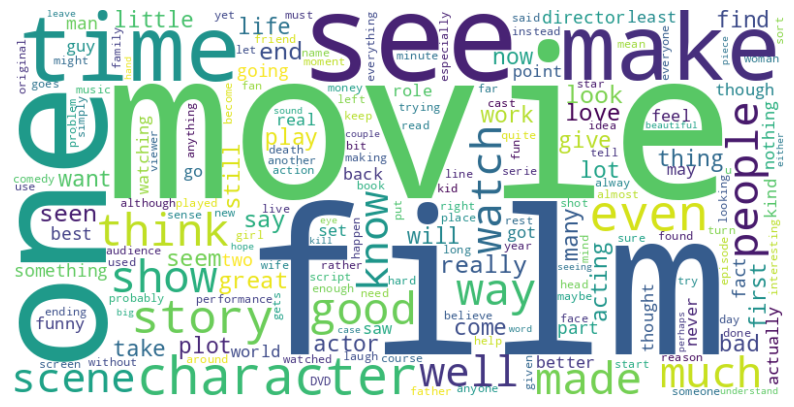

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['cleaned_review']))

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [6]:
import pandas as pd
import re
import nltk
from collections import Counter
from nltk.util import ngrams
from wordcloud import STOPWORDS

data = {'review': [
    "Great product! I love the fast delivery and quality.",
    "Poor experience, bad service. The product broke in a week!",
    "Excellent quality and fantastic customer support!",
    "Delayed shipping, but the product itself is good.",
    "Love the product! Great value for money.",
    "Horrible experience, customer service was very bad.",
    "The packaging was nice, but the delivery was slow.",
    "I am happy with the product, great service and fast shipping."
]}

df = pd.DataFrame(data)

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)

df["cleaned_review"] = df["review"].apply(preprocess_text)

all_reviews = " ".join(df["cleaned_review"])

words = all_reviews.split()
stopwords = set(STOPWORDS)
stopwords.update(["product", "service", "money", "customer"])
filtered_words = [word for word in words if word not in stopwords]
bigrams = list(ngrams(filtered_words, 2))
trigrams = list(ngrams(filtered_words, 3))

bigram_counts = Counter(bigrams)
trigram_counts = Counter(trigrams)

print("🔹 **Top 5 Bigrams:**")
for bigram, count in bigram_counts.most_common(5):
    print(f"{bigram}: {count}")

print("\n🔹 **Top 5 Trigrams:**")
for trigram, count in trigram_counts.most_common(5):
    print(f"{trigram}: {count}")


🔹 **Top 5 Bigrams:**
('experience', 'bad'): 2
('great', 'love'): 1
('love', 'fast'): 1
('fast', 'delivery'): 1
('delivery', 'quality'): 1

🔹 **Top 5 Trigrams:**
('great', 'love', 'fast'): 1
('love', 'fast', 'delivery'): 1
('fast', 'delivery', 'quality'): 1
('delivery', 'quality', 'poor'): 1
('quality', 'poor', 'experience'): 1


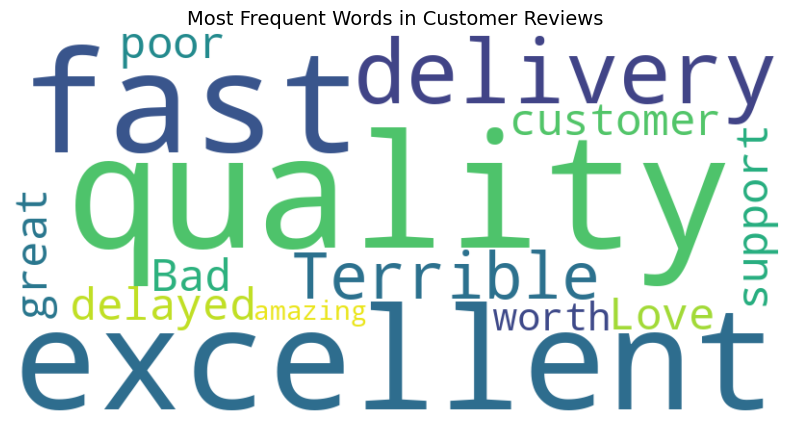

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
data = {'review': [
    "The product quality is excellent and delivery was fast.",
    "Terrible service! The shipping was delayed and the product was poor.",
    "Love this product! Fast shipping and great customer support.",
    "Bad experience! Not worth the money.",
    "Excellent service and amazing quality!"
]}

df = pd.DataFrame(data)
text = " ".join(review for review in df['review'])
stopwords = set(STOPWORDS)
stopwords.update(["product", "service", "shipping", "money", "experience"])

wordcloud = WordCloud(
    width=800, height=400, background_color='white',
    stopwords=stopwords, colormap='viridis'
).generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Most Frequent Words in Customer Reviews", fontsize=14)
plt.show()


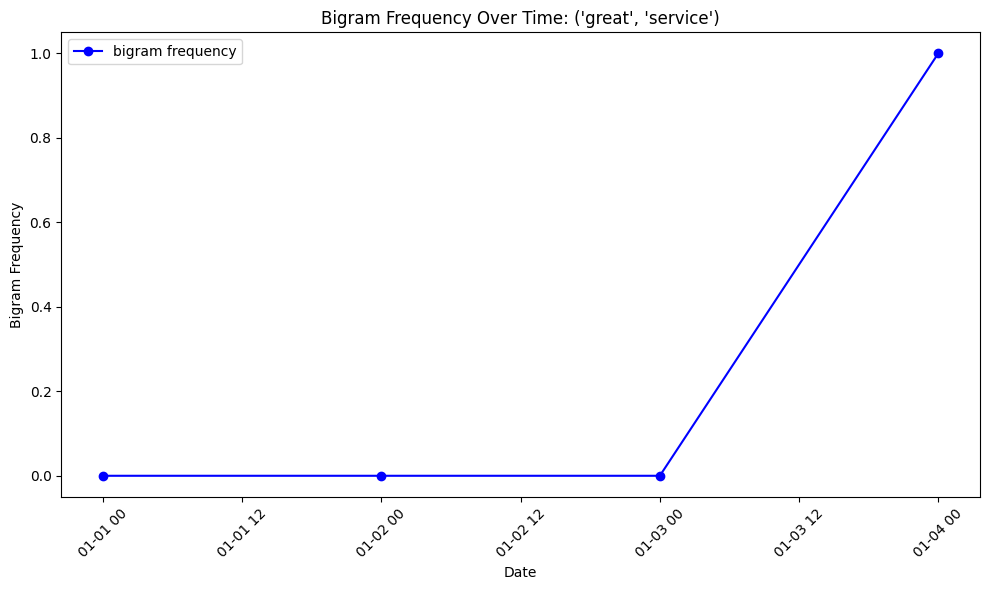

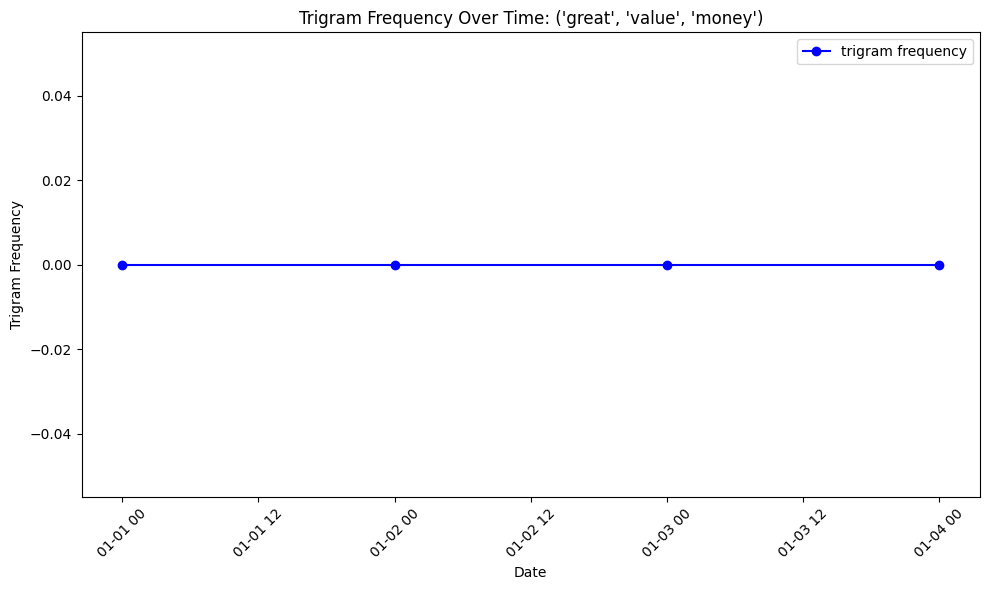

In [9]:
import pandas as pd
import re
import nltk
from collections import Counter
from nltk.util import ngrams
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt

data = {'review': [
    "Great product! I love the fast delivery and quality.",
    "Poor experience, bad service. The product broke in a week!",
    "Excellent quality and fantastic customer support!",
    "Delayed shipping, but the product itself is good.",
    "Love the product! Great value for money.",
    "Horrible experience, customer service was very bad.",
    "The packaging was nice, but the delivery was slow.",
    "I am happy with the product, great service and fast shipping."
],
        'timestamp': [
            '2024-01-01 10:30:00',
            '2024-01-01 12:00:00',
            '2024-01-02 15:00:00',
            '2024-01-02 17:30:00',
            '2024-01-03 08:45:00',
            '2024-01-03 11:00:00',
            '2024-01-04 10:30:00',
            '2024-01-04 14:00:00'
        ]}

df = pd.DataFrame(data)

df['timestamp'] = pd.to_datetime(df['timestamp'])

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)
    return text

df["cleaned_review"] = df["review"].apply(preprocess_text)

all_reviews = " ".join(df["cleaned_review"])

words = all_reviews.split()

stopwords = set(STOPWORDS)
stopwords.update(["product", "service", "money", "customer"])  # Custom stopwords
filtered_words = [word for word in words if word not in stopwords]

bigrams = list(ngrams(filtered_words, 2))
trigrams = list(ngrams(filtered_words, 3))

bigram_counts = Counter(bigrams)
trigram_counts = Counter(trigrams)

top_bigrams = bigram_counts.most_common(5)
top_trigrams = trigram_counts.most_common(5)

df['date'] = df['timestamp'].dt.date

def get_ngrams_per_day(df, ngram_type='bigram'):
    ngram_counts_by_day = []

    for date, group in df.groupby('date'):
        text = " ".join(group['cleaned_review'])
        words = text.split()


        if ngram_type == 'bigram':
            ngrams_list = list(ngrams(words, 2))
        else:
            ngrams_list = list(ngrams(words, 3))


        ngram_count = Counter(ngrams_list)

        ngram_counts_by_day.append((date, ngram_count))

    return ngram_counts_by_day

bigram_counts_by_day = get_ngrams_per_day(df, ngram_type='bigram')

trigram_counts_by_day = get_ngrams_per_day(df, ngram_type='trigram')

def plot_ngram_frequency_over_time(ngram_counts_by_day, target_ngram, ngram_type='bigram'):
    dates = []
    counts = []

    for date, ngram_count in ngram_counts_by_day:
        if target_ngram in ngram_count:
            dates.append(date)
            counts.append(ngram_count[target_ngram])
        else:
            dates.append(date)
            counts.append(0)

    plt.figure(figsize=(10,6))
    plt.plot(dates, counts, marker='o', color='b', label=f'{ngram_type} frequency')
    plt.title(f'{ngram_type.capitalize()} Frequency Over Time: {target_ngram}')
    plt.xlabel('Date')
    plt.ylabel(f'{ngram_type.capitalize()} Frequency')
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()

target_bigram = ('great', 'service')
plot_ngram_frequency_over_time(bigram_counts_by_day, target_bigram, ngram_type='bigram')

target_trigram = ('great', 'value', 'money')
plot_ngram_frequency_over_time(trigram_counts_by_day, target_trigram, ngram_type='trigram')

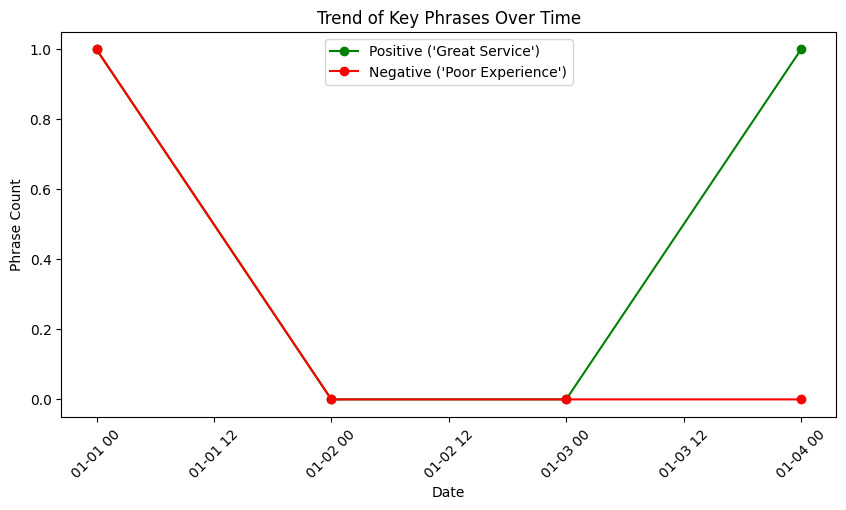

In [10]:
import pandas as pd
import re
import matplotlib.pyplot as plt

# Sample dataset with timestamps
data = {'review': [
    "Great service and fast delivery!",
    "Poor experience, bad service. The product broke in a week!",
    "Excellent quality and fantastic customer support!",
    "Delayed shipping, but the product itself is good.",
    "Love the product! Great value for money.",
    "Horrible experience, customer service was very bad.",
    "The packaging was nice, but the delivery was slow.",
    "I am happy with the product, great service and fast shipping."
],
        'timestamp': [
            '2024-01-01 10:30:00',
            '2024-01-01 12:00:00',
            '2024-01-02 15:00:00',
            '2024-01-02 17:30:00',
            '2024-01-03 08:45:00',
            '2024-01-03 11:00:00',
            '2024-01-04 10:30:00',
            '2024-01-04 14:00:00'
        ]}

df = pd.DataFrame(data)

# Convert timestamp to datetime and extract date
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['date'] = df['timestamp'].dt.date

# Preprocess text (convert to lowercase, remove punctuation & numbers)
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\d+', '', text)  # Remove numbers
    return text

df["cleaned_review"] = df["review"].apply(preprocess_text)

# Define key phrases to track
positive_phrase = "great service"
negative_phrase = "poor experience"

# Function to count occurrences of key phrases
def count_phrase(text, phrase):
    return text.count(phrase)

# Count occurrences per day
df["positive_count"] = df["cleaned_review"].apply(lambda x: count_phrase(x, positive_phrase))
df["negative_count"] = df["cleaned_review"].apply(lambda x: count_phrase(x, negative_phrase))

# Aggregate by date
trend_data = df.groupby("date")[["positive_count", "negative_count"]].sum()

# Plot trends
plt.figure(figsize=(10,5))
plt.plot(trend_data.index, trend_data["positive_count"], marker='o', linestyle='-', color='green', label="Positive ('Great Service')")
plt.plot(trend_data.index, trend_data["negative_count"], marker='o', linestyle='-', color='red', label="Negative ('Poor Experience')")
plt.xlabel("Date")
plt.ylabel("Phrase Count")
plt.title("Trend of Key Phrases Over Time")
plt.legend()
plt.xticks(rotation=45)
plt.show()

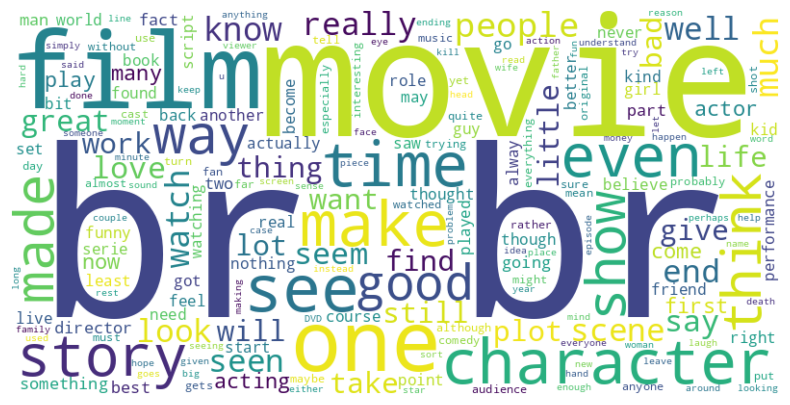

In [ ]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("IMDB Dataset (1).csv")

# Check if the 'review' column exists
if 'review' in df.columns:
    # Combine all reviews into a single text string
    text_data = " ".join(df['review'].astype(str))  # Convert all reviews to strings and join them

    # Create a word cloud object
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)

    # Display the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")  # Hide axes
    plt.show()
else:
    print("The dataset does not contain a 'review' column.")


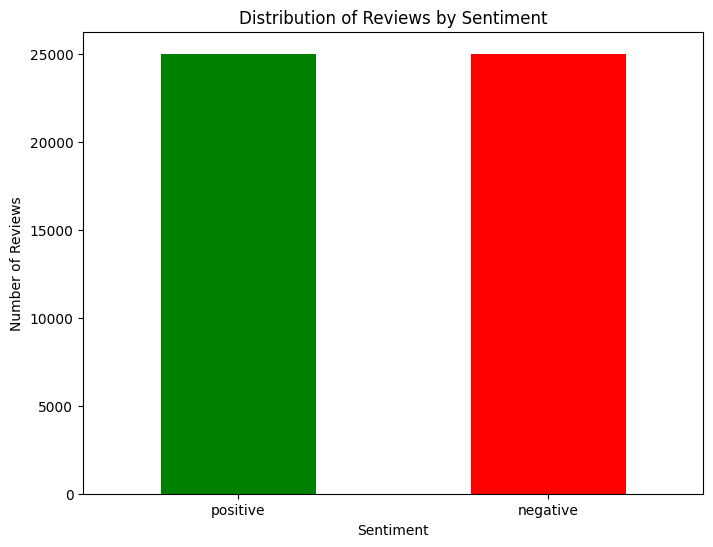

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("IMDB Dataset (1).csv")
if 'sentiment' in df.columns:
    sentiment_counts = df['sentiment'].value_counts()
    plt.figure(figsize=(8, 6))
    sentiment_counts.plot(kind='bar', color=['green', 'red'])

    plt.title('Distribution of Reviews by Sentiment')
    plt.xlabel('Sentiment')
    plt.ylabel('Number of Reviews')

    # Show the plot
    plt.xticks(rotation=0)  # To keep the sentiment labels horizontal
    plt.show()
else:
    print("The dataset does not contain a 'sentiment' column.")


In [11]:
!pip install vaderSentiment
!pip install textblob
!pip install matplotlib
!pip install nltk

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.4 MB/s eta 0:00:00


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from textblob import TextBlob
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [14]:
from nltk.corpus import stopwords
import re

stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

df['cleaned_review'] = df['review'].apply(clean_text)
df.head()


,review,timestamp,date,cleaned_review,positive_count,negative_count
0,Great service and fast delivery!,2024-01-01 10:30:00,2024-01-01,great service fast delivery,1,0
1,"Poor experience, bad service. The product brok...",2024-01-01 12:00:00,2024-01-01,poor experience bad service product broke week,0,1
2,Excellent quality and fantastic customer support!,2024-01-02 15:00:00,2024-01-02,excellent quality fantastic customer support,0,0
3,"Delayed shipping, but the product itself is good.",2024-01-02 17:30:00,2024-01-02,delayed shipping product good,0,0
4,Love the product! Great value for money.,2024-01-03 08:45:00,2024-01-03,love product great value money,0,0


In [15]:

sentiment_counts = df['sentiment_vader'].value_counts()

plt.figure(figsize=(8,6))
sentiment_counts.plot(kind='bar', color=['green', 'red', 'gray'])
plt.title('Sentiment Distribution of Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=0)
plt.show()

KeyError: 'sentiment_vader'

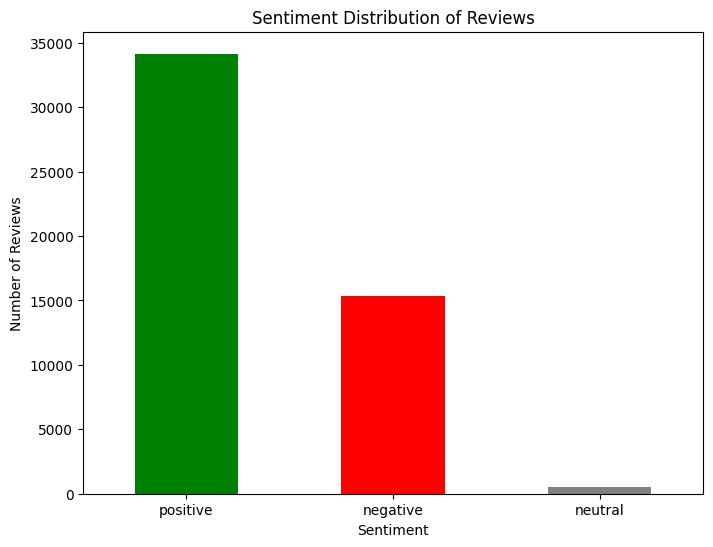

In [ ]:
# Plot sentiment distribution
sentiment_counts = df['sentiment_vader'].value_counts()

plt.figure(figsize=(8,6))
sentiment_counts.plot(kind='bar', color=['green', 'red', 'gray'])
plt.title('Sentiment Distribution of Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=0)
plt.show()


In [16]:
# Scatter plot of Polarity vs Subjectivity
plt.figure(figsize=(8,6))
plt.scatter(df['polarity'], df['subjectivity'], alpha=0.5, color='blue')
plt.title('Polarity vs Subjectivity of Reviews')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

KeyError: 'polarity'

<Figure size 800x600 with 0 Axes>

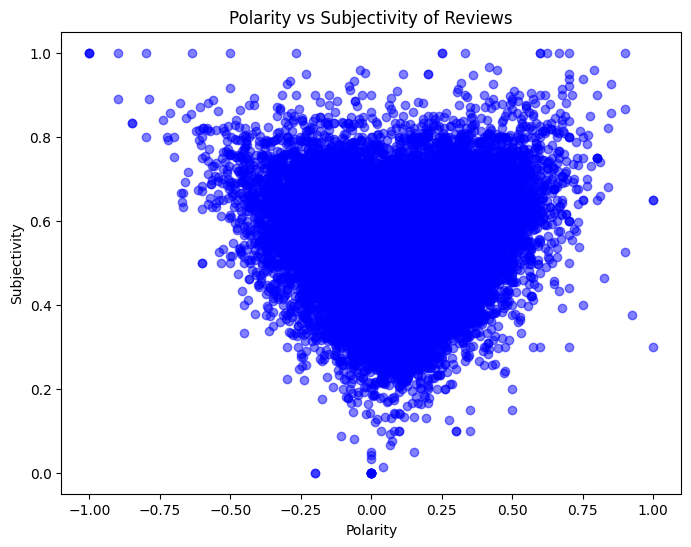

In [ ]:
# Scatter plot of Polarity vs Subjectivity
plt.figure(figsize=(8,6))
plt.scatter(df['polarity'], df['subjectivity'], alpha=0.5, color='blue')
plt.title('Polarity vs Subjectivity of Reviews')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()


In [17]:
from textblob import TextBlob
texts = [
    "I love the service at this restaurant",
    "This is the worst movie I've ever seen",
    "I feel great about this product",
    "I am very disappointed with the service",
    "The food was excellent!",
    "I had a terrible experience",
    "The hotel is beautiful, but expensive",
    "I would highly recommend this place",
    "Not worth the money, completely overrated",
    "Fantastic experience, will come again"
]
def get_sentiment(text):
    blob = TextBlob(text)
    sentiment = blob.sentiment
    polarity = sentiment.polarity
    subjectivity = sentiment.subjectivity

    if polarity > 0:
        return "Positive"
    elif polarity < 0:
        return "Negative"
    else:
        return "Neutral"
for text in texts:
    sentiment = get_sentiment(text)
    print(f"Text: {text}\nPredicted Sentiment: {sentiment}\n")


Text: I love the service at this restaurant
Predicted Sentiment: Positive

Text: This is the worst movie I've ever seen
Predicted Sentiment: Negative

Text: I feel great about this product
Predicted Sentiment: Positive

Text: I am very disappointed with the service
Predicted Sentiment: Negative

Text: The food was excellent!
Predicted Sentiment: Positive

Text: I had a terrible experience
Predicted Sentiment: Negative

Text: The hotel is beautiful, but expensive
Predicted Sentiment: Positive

Text: I would highly recommend this place
Predicted Sentiment: Positive

Text: Not worth the money, completely overrated
Predicted Sentiment: Negative

Text: Fantastic experience, will come again
Predicted Sentiment: Positive



In [18]:
import matplotlib.pyplot as plt

df['sentiment'].value_counts().plot(kind='bar')
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

KeyError: 'sentiment'

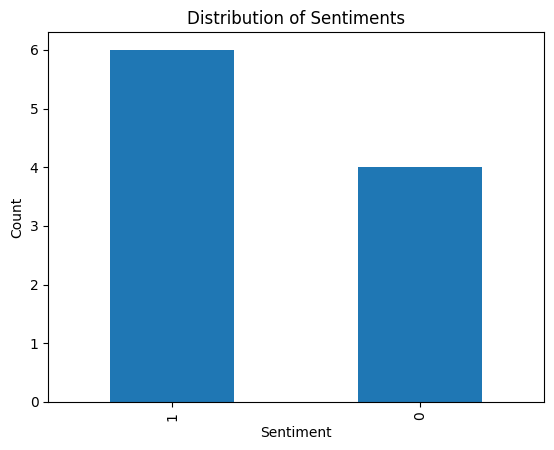

In [ ]:
import matplotlib.pyplot as plt

df['sentiment'].value_counts().plot(kind='bar')
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


In [ ]:
from sklearn.decomposition import LatentDirichletAllocation

# Apply LDA (2 topics as an example)
lda = LatentDirichletAllocation(n_components=2, random_state=42)
lda.fit(X)

# Display topics and the top words for each topic
terms = vectorizer.get_feature_names_out()
for index, topic in enumerate(lda.components_):
    print(f"Topic #{index + 1}:")
    print([terms[i] for i in topic.argsort()[-10:]])  # Top 10 words for each topic


Topic #1:
['great', 'feel', 'product', 'about', 'experience', 'this', 'terrible', 'had', 'the', 'is']
Topic #2:
['would', 'highly', 'recommend', 'place', 'was', 'food', 'excellent', 'this', 'service', 'the']
